<h1 style="text-align:center; color:MediumSlateBlue;">LeNet on CIFAR-10 dataset</h1>

<h3>Import libraries & packages</h3>

In [1]:
import pickle
import numpy as np
from matplotlib import pyplot as plt

<h3>Load data</h3>

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
def load_cifar10(data_path):

    train_data = None
    train_labels = []
    test_data = None
    test_labels = None


    for i in range(1, 6):
        data_dict = unpickle(data_path + "data_batch_" + str(i))
        if (i == 1):
            train_data = data_dict[b'data']
        else:
            train_data = np.vstack((train_data, data_dict[b'data']))
        train_labels += data_dict[b'labels']

    test_data_dict = unpickle(data_path + "test_batch")
    test_data = test_data_dict[b'data']
    test_labels = test_data_dict[b'labels']

    train_data = train_data.reshape((50000, 3, 32, 32))
    train_data = np.rollaxis(train_data, 1, 4)
    train_labels = np.array(train_labels)
    
    test_data = test_data.reshape((10000, 3, 32, 32))
    test_data = np.rollaxis(test_data, 1, 4)
    test_labels = np.array(test_labels)
    
    return train_data, train_labels, test_data, test_labels

In [4]:
data_path = "./cifar-10-batches-py/"
train_data, train_labels, test_data, test_labels = load_cifar10(data_path)

In [5]:
print("train_data.shape:", train_data.shape, "train_labels.shape:", train_labels.shape)
print("test_data.shape:", test_data.shape, "test_labels.shape:", test_labels.shape)

train_data.shape: (50000, 32, 32, 3) train_labels.shape: (50000,)
test_data.shape: (10000, 32, 32, 3) test_labels.shape: (10000,)


Test

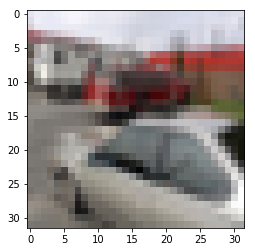

In [6]:
plt.imshow(train_data[-1])
plt.show()

<h3>Data preprocessing</h3>

In [7]:
def scale_data(data):
    """ 
    Scale the row pixel intensities to the range [0, 1]
    """
    data = data.astype(np.float32) / 255.0
    return data

train_data = scale_data(train_data)
test_data = scale_data(test_data)